# Desafio 7

¡Bienvenidos, intrépidos data scientists y fanáticos del anime, a una tarea de preprocesamiento de datos llena de aventuras en el fascinante universo de las series de anime! En esta épica misión, te embarcarás en un viaje para convertir un conjunto de datos de episodios de anime en una fuente de conocimiento de alta calidad. Tu destino final es preparar estos datos para un análisis en profundidad y desbloquear los secretos que se
ocultan en el mundo del anime.
La primera etapa de tu búsqueda implica la evaluación de la calidad de los datos. Como un verdadero cazador de datos, deberás rastrear y enfrentarte a los temibles valores atípicos, los datos faltantes que se esconden como camaleones y las inconsistencias que acechan en la oscuridad. Tu tarea es purificar los datos, como un héroe que elimina las impurezas en su camino. Documenta cada movimiento que haces para despejar estos obstáculos.

En tu próxima parada, te sumergirás en un mundo de análisis exploratorio. Armado con tu caja de herramientas de estadísticas y gráficos, desentrañarás los secretos de la distribución de variables clave. ¿Qué revelarán las gráficas y las estadísticas descriptivas? Estás destinado a descubrir patrones intrigantes y tendencias fascinantes. Estas revelaciones podrían convertirse en tu guía en este viaje. 

Siguiendo tu viaje, ejercerás tu poder para crear nuevas características. Como un mago que conjura hechizos, concebirás al menos dos características nuevas que pueden enriquecer el análisis de episodios de anime. Comparte tus poderes de creación y explica el origen de estas nuevas características, así como la magia que utilizaste para calcularlas. 

La Selección del Elegido

En un giro inesperado, utilizarás un método de selección de características para identificar las joyas más valiosas entre tus tesoros de datos. ¿Cuáles de estas características son las más importantes para predecir el destino de los episodios de anime? Tus elecciones deben ser sabias, como un rey que selecciona a sus caballeros. Esta etapa es crucial, y tu reino de conocimiento depende de ello. 

Como un guerrero que se entrena constantemente, no te detendrás en la selección de características. Continuarás tu viaje iterativo, explorando cómo esta elección afecta tu comprensión y el rendimiento general del análisis. La adaptación es tu compañera constante. 

Finalmente, compartirás tus hallazgos en una presentación épica. Crearás un informe o una presentación que resuma tus aventuras en el preprocesamiento de datos. Incluirás visualizaciones deslumbrantes, estadísticas sorprendentes y explicaciones que permitan a otros exploradores de datos seguir tus pasos. Destacarás los tesoros ocultos que
descubriste en tu análisis exploratorio y cómo estas gemas pueden iluminar el camino hacia el entendimiento.


Recuerda, este viaje es un proceso épico y, como todo gran viaje, está lleno de desafíos y descubrimientos sorprendentes. Demuestra tu valía como un data scientist audaz y astuto, y que tu legado perdure en el vasto mundo del anime. ¡Buena suerte en tu búsqueda, aventurero de datos!


Para llevar a cabo todo esto, necesitarás el archivo de datos imdb_anime.csv, que contiene las siguientes columnas:
- Title: Nombre de la animación
- Genre: Género(s) bajo el cual cae la animación, por ejemplo, Acción, Aventura, etc.
- User Rating: IMDb calificación de usuarios sobre 10.
- Number of Votes: Total de usuarios de IMDb que han calificado la animación.
- Runtime: Duración de la animación en minutos.
- Year: Año en que se estrenó o comenzó a emitirse la animación.
- Summary: Un resumen breve o completo de la trama de la animación. Resúmenes completos se obtienen cuando están disponibles.
- Stars: Lista de actores principales o actores de voz involucrados en la animación.
- Certificate: Certificación de la animación, por ejemplo, PG, PG-13, etc.
- Metascore: Calificación de Metascore, si disponible, que es una puntuación agregada
de varios críticos.
- Gross: Ganancias brutas o recaudación en taquilla de la animación.
- Episode: Indicador binario si la lista es para un episodio de una serie (1 para sí, 0 para no).
- Episode Title: Título del episodio si la lista es para un episodio; de lo contrario, será None (Ninguno).


Considerando estos datos:
1. Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio inicial considerando gráficos de distribuciones de las diferentes variables, y concluye al respecto. Si observas algo raro respecto a los tipos de variables debes proponer algún tratamiento.
2. Transformación Inicial de Datos: las diferentes columnas que son datos de texto deben ser transformadas a numéricas para poder explorarlas de mejor forma por ejemplo:
    - User Rating: Extraer el número correspondiente al rating
    - Number of Votes: Convertir en número
    - Year: Extraer el año de inicio del anime
    - Otros. Aplica algún criterio para saber qué variables deben ser transformadas en primera instancia. 
3. Revisión de outliers: ahora que tienes variables numéricas revisa la distribución y utiliza algún método para encontrar outliers, por ejemplo IQR o Z-score.
4. Transformación de variables finales: realiza un pequeño análisis de distribuciones y transforma las variables aplicando transformaciones como logaritmo o get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar con los valores nulos y crea las variables que te parezcan necesarias.
5. Análisis de Correlaciones: genera un análisis de correlaciones de las variables. No es necesario que apliques todos los métodos vistos en clases, basta que argumentes bien cuál utilizarás y por qué, y si necesitas algo más. La idea es generar gráficos para entender la relación entre las diferentes variables, poniendo foco en la variable
objetivo.
6. Genera una función que resuma todo el procesamiento necesario para el dataset, que lea el dataset original y entregue un dataset ya tratado, con las columnas transformadas y creadas.
7. A partir de las columnas que obtuviste realiza una selección de variables según los siguientes métodos:
    - Filtros basados en correlaciones
    - Forward Selection.
Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el análisis exploratorio.


Requerimientos
1. Analiza datos y los prepara considerando datos nulos, faltantes o outliers,
considerando el contexto dado y necesidades de transformación. (3 puntos)
2. Analiza correlaciones entre variables, justificando su selección desde el contexto e
interpretando los indicadores obtenidos. (3 puntos)
3. Selecciona variables para un análisis, considerando diferentes métodos e
interpretando sus resultados. (4 puntos)

In [6]:
import pandas as pd
import statsmodels as ss
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import numpy as np
import missingno as msngo
import itertools

In [7]:
df = pd.read_excel('Data/imdb_anime.xlsx')
df.head()

Title                         Genre  \
0                                    One Piece  Animation, Action, Adventure   
1  Teenage Mutant Ninja Turtles: Mutant Mayhem  Animation, Action, Adventure   
2                  The Super Mario Bros. Movie  Animation, Adventure, Comedy   
3                              Attack on Titan  Animation, Action, Adventure   
4                               Jujutsu Kaisen  Animation, Action, Adventure   

  User Rating Number of Votes Runtime         Year  \
0         8.9          187689  24 min     (1999– )   
1         7.4           28895  99 min        -2023   
2         7.1          189108  92 min        -2023   
3         9.1          434457  24 min  (2013–2023)   
4         8.5           82909  24 min     (2020– )   

                                             Summary  \
0  Follows the adventures of Monkey D. Luffy and ...   
1  The film follows the Turtle brothers as they w...   
2  A plumber named Mario travels through an under...   
3  After his hometown is destroyed and his mother...   
4  A boy swallows a cursed talisman - the finger ...   

                                               Stars Certificate Metascore  \
0  Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14       NaN   
1                                                NaN          PG        74   
2                                                NaN          PG        46   
3  Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA       NaN   
4  Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA       NaN   

    Gross Episode Episode Title  
0  187689       0           NaN  
1   28895       0           NaN  
2  189108       0           NaN  
3  434457       0           NaN  
4   82909       0           NaN

<Axes: >

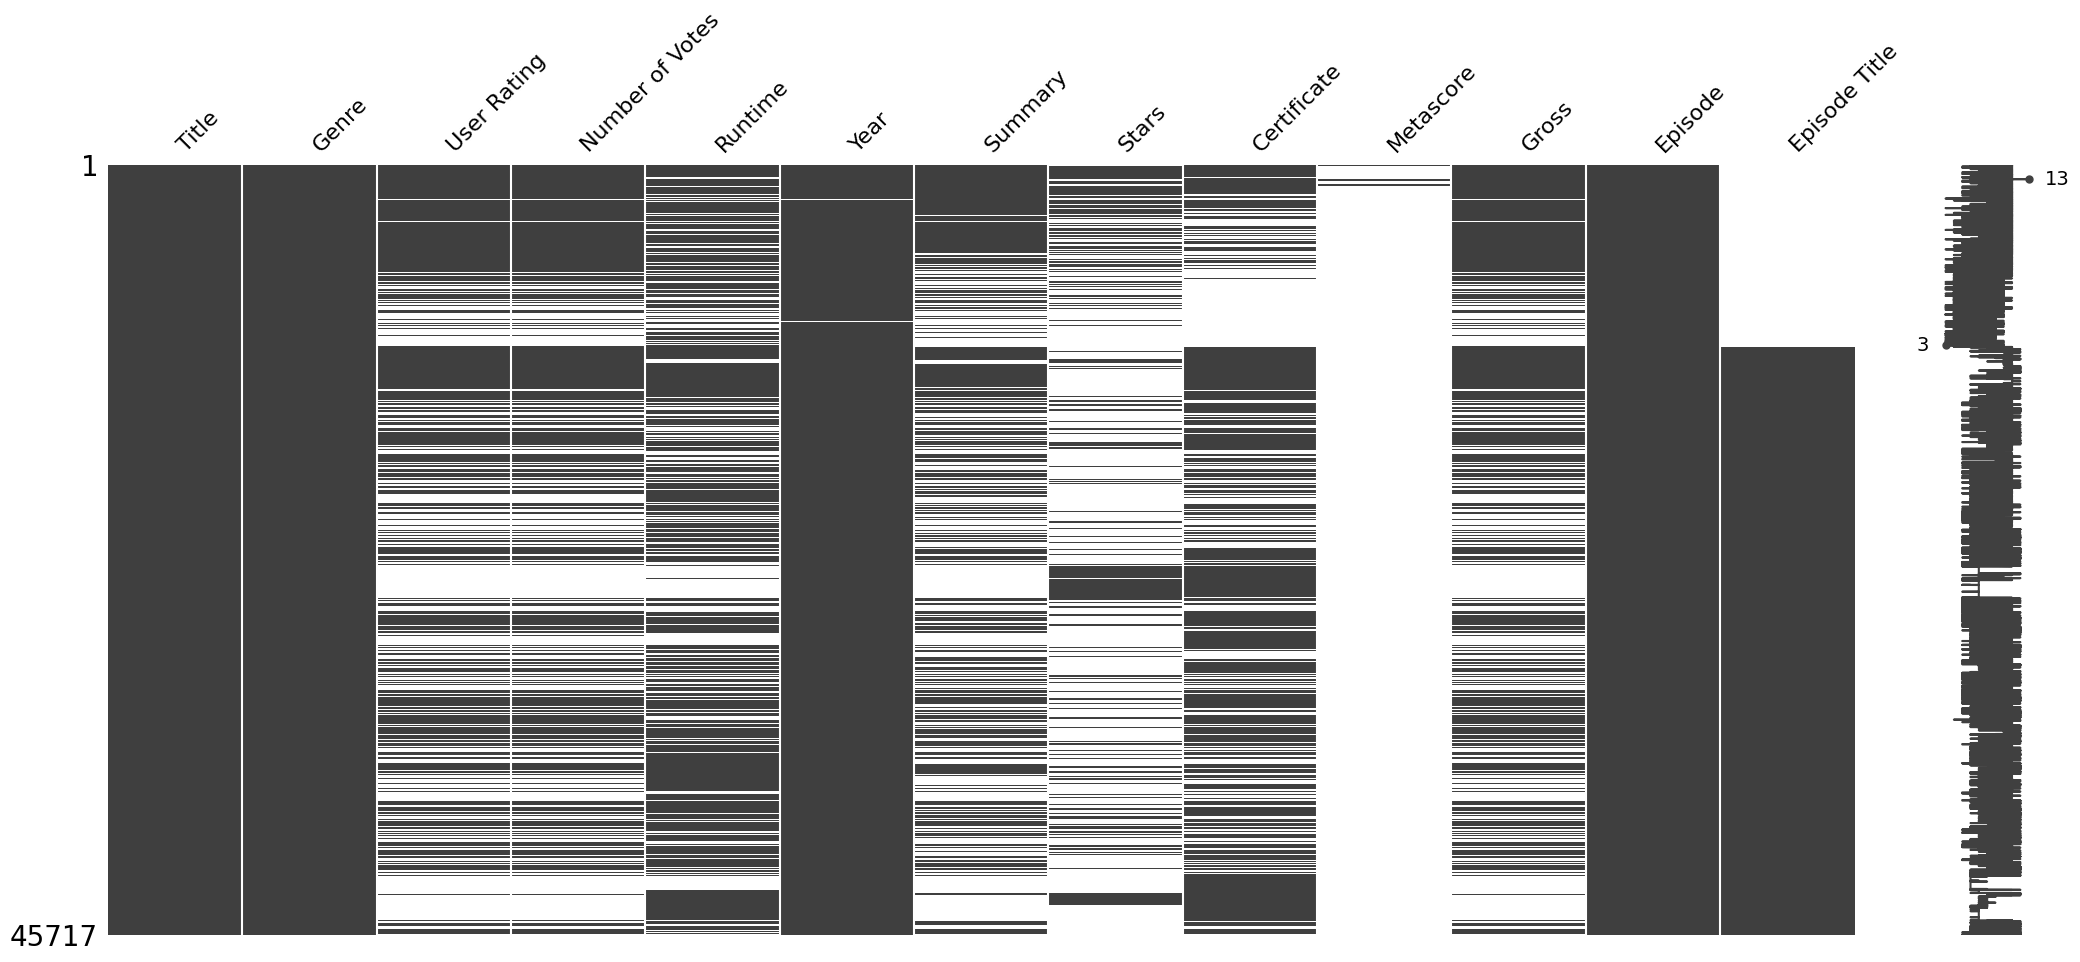

In [9]:
msngo.matrix(df)

Podemos ver la presencia de muchos nulos en casi todas las columnas, se analizará el como tratarlas

In [13]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


### User Rating

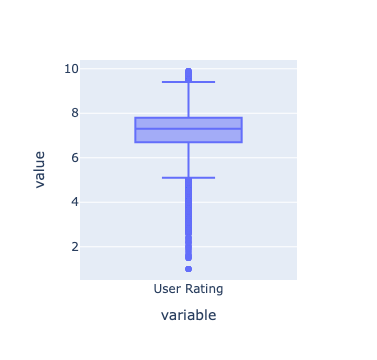

In [24]:
df_ur = df[pd.notna(df['User Rating']) & (df['User Rating'] != 'User Rating')].astype({'User Rating': np.float64} )
fig = px.box(df_ur['User Rating'])
fig.show()

### Year

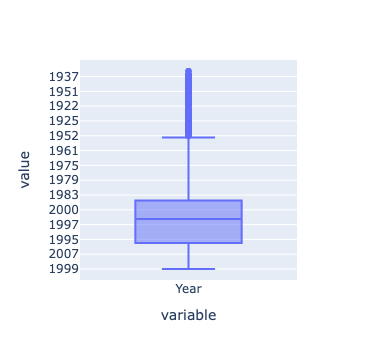

In [59]:
def clean_year(year_str):
    year_str = f'{year_str}'.replace("(", "").replace(")", "").replace("–", " ").replace("-", " ").split()
    for el in year_str:
        if el.isdigit():
            return el
df['Year'] = df.Year.apply(clean_year)
fig = px.box(df.Year)
fig.show()

### Runtime

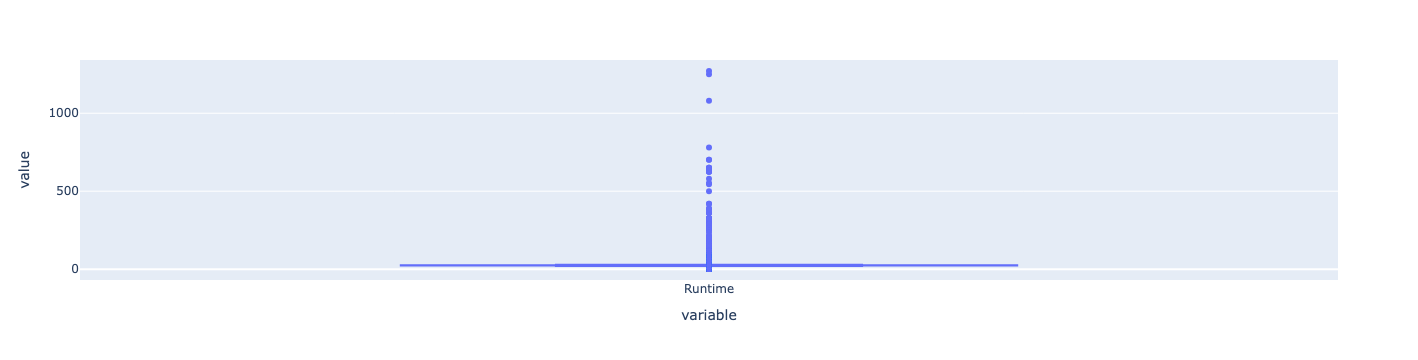

In [83]:
df.Runtime = df.Runtime.apply(lambda x: f'{x}'.replace(",", "").split()[0] if x != 'Runtime' else None).astype(np.float32)
fig = px.box(df.Runtime)
fig.show()

### Number of Votes

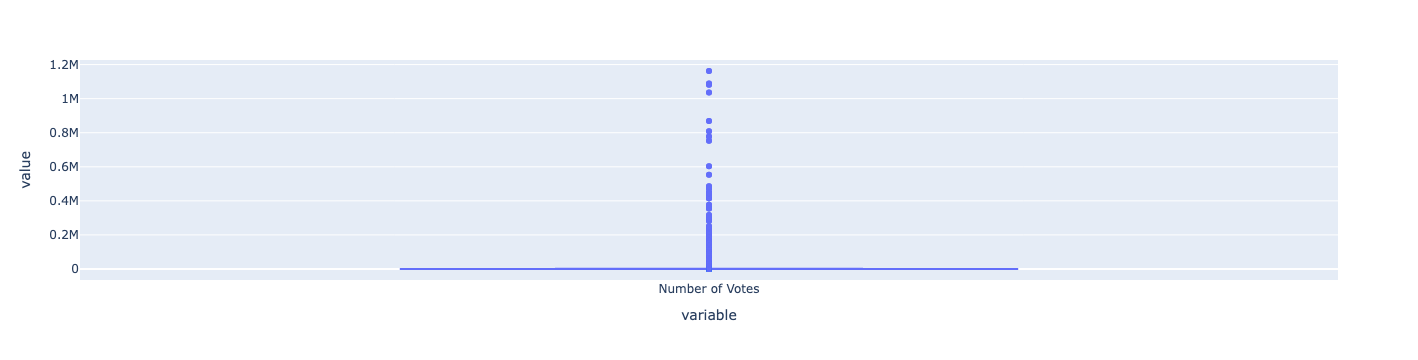

In [89]:
df['Number of Votes'] = df['Number of Votes'].apply(lambda x: x if x != 'Number of Votes' else None).astype(np.float32)
fig = px.box(df['Number of Votes'])
fig.show()